# Lecture 4, Data science in Neuroscience


## Plan for today

1. Review of last week's exercises: Reconstructing our mean waveforms
2. Overview of the next weeks
3. Data analysis project 1
4. Introduction to machine learning
5. Quizz on machine learning
6. Speed cell: a simple example of machine learning with a linear regression

***

## Review of last week's exercises

see `lecture_03.ipynb`

***


## Data analysis project 1

In the last step of the spike extraction procedure, we applied a K-means clustering algorithm to our spike waveform. Was this the best choice for this problem?

In a jupyter notebook, compare k-means clustering with at least 3 other clustering techniques available in [Scikit-learn](https://scikit-learn.org/stable/modules/clustering.html#clustering). 

For each of 4 clustering technique (including k-means):
1. Describe briefly how the algorhithm works
2. List a few advantages and disadvantages of the technique
3. Apply the techniques to your waveforms
4. Display the results

As a conclusion, and based on what you learned, choose which technique you think is the best for clustering our spike waveforms. Describe in a few reasons why you chose this algorighm.



***
## Overview of the next weeks

1. Machine learning introduction (25.11.2021)
2. Behavioral tracking with a deep neural network (Deeplabcut) (02.12.2021)
3. Behavioral correlates of firing activity (place cells and grid cells) (09.12.2021)
4. Statistical testing (16.12.2021)
4. Presentation of data analysis project (16.01.2022)


***
## Introduction to machine learning

What is machine learning?


**Machine learning is the field of study that gives computers the ability to learn without being explicitly programmed.**

**The computer learns from input data to achieve a specific objective.**

Examples: 

* A program learns to identify the nose, ears and tail of a mouse in images (complex model). 
* A program learns the linear relationship between the firing rate of a neuron and the running speed of an animal (simple model).


## Why should you care about machine learning as a Neuroscientist?


Machine learning is behind many modern tools used by neuroscients.

* [Track behavior](https://www.nature.com/articles/s41593-018-0209-y)
* [Image segmentation (e.g., cell counting)](https://www.nature.com/articles/s41592-018-0261-2)
* [Spike extraction and clustering](https://www.biorxiv.org/content/10.1101/061481v1)

They make new experiments possible. They can discover patterns in your data.

These are state-of-the-art software in their respective field.

## Objective during this course

* Understand what machine learning is.
* Get faminiar with the terminology
* Experiment with a few examples
* Try to go from math formulas to python code

## Definition of machine learning

* Input: $X$ (single number or an array)
* Output: $Y$ (single number or an array)
* Unknown function or model: $f()$
* Random error: $\epsilon$

$Y = f(X) + \epsilon $

Machine learning refers to a set of approaches for estimating the best parameters in $f()$

$f()$ can be the the equation for a line or a deep neural network with millions of parameters.

***
## What is learning?

Learning can be defined as finding the best model parameters to solve a problem.

**Simple example**: Find the relationship between IQ and education with a linear regression model. Two parameters ($a$ and $b$).

$y = a*x + b $

**Complex example**: Find a mouse in an image. Millions of parameters.


<div>
<img src="../images/deep-neural-network.png" width="500"/>
</div>



## A typical training loop

1. Initialize the model with random parameters
2. Feed data with labels to your model
3. Calculate the error of your model (using a loss function).
4. Adjust the model parameters by a small amount to reduce the error.
5. Go back to 2.

This training loop is very common in machine learning.

***
# Terminology in machine learning

## Prediction versus inference

Why do we want to estimate $f$?


### Prediction

* We focus on predicting $Y$.
* $f$ is treated as a black box

### Inference

* **Understand** a phenomena by modelling it.
* Which predictors are associated with the response?
* Is the relation between $Y$ and each predictor adequately summarized using a linear equation?


***
## Supervised versus unsupervised

### Supervised
* The training set contains labeled data.
* For each observation of the predictors $X_{i}, i = 1,...,n$ there is a known response measurement $y_{i}$.
* Example: linear regression

### Unsupervised
* Uncovering hidden patterns from unlabeled data.
* For each observation $i = 1,...,n$, we observed a vector of measurements $X_{i}$, but no response $y_{i}$.
* Examples: PCA and k-means clustering used in lecture 3.


***
## Regression versus classification

### Regression

* $Y$ is a continuous variable
* Examples: Numbers from 0 to 100

### Classification

* $Y$ is a categorical variable
* Examples: Classify cats and dogs, 
* Different types of neurons (pyramidal cells vs interneurons)


***
## Training and test sets

### Training set

* The observations (data points) that we use to estimate $f$ (to train our model). 

### Test set

* Observations used to test how accurate our model is. The model has never "seen" this data because they are not used during training!

* The test set is very important when using complex models with many parameters. Complex models can learn to perform great on your training set but may generalize very poorly to new data. This is called **overfitting**. You can assess whether your model is overfitting using a test set.


***
## Time for a quizz!

[Quizz ink](https://forms.gle/uYvtpkNYX7foZFUZ6)

or

https://forms.gle/uYvtpkNYX7foZFUZ6


You have 7 minutes to complete the questions.


***
# Using machine learning to characterize a speed cell.

**Speed cell**: Neuron that increases its firing rate when the animal runs at higher speed. These neurons have been observed in several brain areas, including the medial entorhinal cortex, hippocampus, and visual cortex.

[Speed cells in the medial entorhinal cortex (2015) Nature](https://www.nature.com/articles/nature14622)


<div>
<img src="../images/speed_kropff.png" width="1000"/>
</div>



## Our task

Write and **train a linear model** that will describe how the firing rate of a neuron is related to the running speed of a mouse.

Because we want to understand how machine learning works under the hood, we will do all the steps without using external libraries like scipy, scikit-learn or pytorch.



## A simulated speed cell

To know if our modeling approach is working, it is useful to start with simulated data. The main advantage is that we know the exact parameters that were used when generating the data. If your approach works, it should find the same parameters.

* When coding, it is usually a good idea to start with simulated data. Some problems will be easier to fix. You can easily manipulated/change simulated data and assess the effect on your model.
* Try to make your simulated data as similar as the real data with which you plan to use the model.


#### Position data from a real experiment

We can load position tracking data from a real experiment with a mouse. The file contains the position of the animal as a function of time. 

The animal was exploring an arena with a diameter of 80 cm.

The duration of the recording is 10 minutes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fn="../data/animal_path.npy"
path = np.load(fn)
# get some information about the data just loaded
print(type(path), path.ndim, path.shape)

<class 'numpy.ndarray'> 2 (30000, 3)


This is a NumPy array with 2 dimensions. It contains 30000 rows and 3 columns. 

The columns are :

* column 0: time in seconds
* column 1: x position in cm
* column 2: y positiony in cm

To work with meaningful variable names, we will save the data in `time`, `x` and `y`

In [3]:
time = path[:,0]
x = path[:,1]
y = path[:,2]

Have a look at the data to ensure they were loaded correctly.

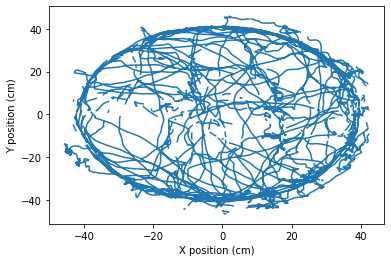

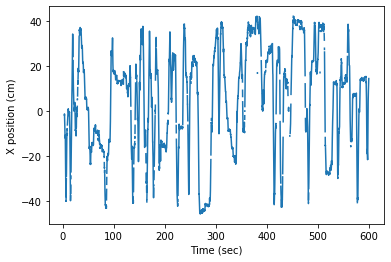

In [4]:
plt.plot(x,y)
plt.xlabel("X position (cm)")
plt.ylabel("Y position (cm)")
plt.show()
plt.plot(time,x)
plt.xlabel("Time (sec)")
plt.ylabel("X position (cm)")
plt.show()

#### Exercise: Calculate running speed
We need to calculate the speed of the animal from the position data.

A google search reveals that speed is distance/time. 

You find that distance: $D= \sqrt{(x1-x0)^2 + (y1-y0)^2}$

How would you calculate the distance from the position data?

In [5]:
xd = np.diff(x,append=np.nan)
yd = np.diff(y,append=np.nan)
td = np.diff(time,append=np.nan)

In [6]:
D = np.sqrt(xd**2 + yd**2)

In [7]:
speed = D/td # get speed from distance

Speed: $D/t$, where $t$ is the time elapsed between time 0 and time 1.

In [8]:
# we can remove the np.nan values for our simulation
valid_indices = ~np.isnan(speed)
speed = speed[valid_indices]
time = time[valid_indices]
print(time.shape)

(27304,)


Always inspect your data with a few plots

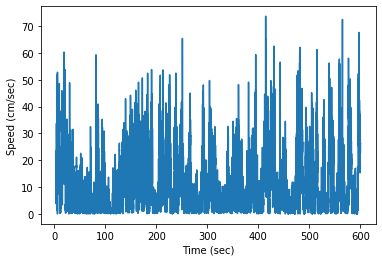

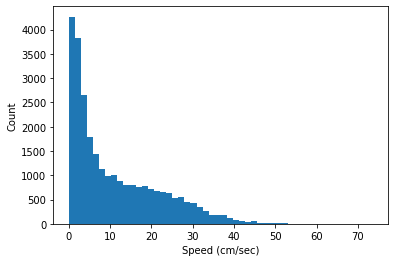

In [9]:
plt.plot(time,speed)
plt.xlabel("Time (sec)")
plt.ylabel("Speed (cm/sec)")
plt.show()
plt.hist(speed,bins=50)
plt.xlabel("Speed (cm/sec)")
plt.ylabel("Count")
plt.show()

The animal is running between 0 and 40 cm/sec most of the time. This seems reasonable. 

#### Model the firing rate of a neuron 

We will assume that the firing rate of our neuron is linearly related to the running speed of the animal.

$rate = speed*w + b + error$


In [10]:
w = 1.25 # parameter 2
b = 10 # parameter 1

#### Exercise

* Write the formula just above in code
* Use it to predict the firing rate of the neuron
* plot speed and rate

Text(0, 0.5, 'Rate (Hz)')

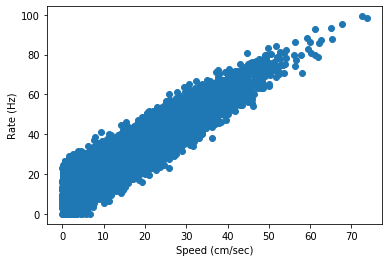

In [12]:
rate = np.maximum(0,speed*w + b + np.random.normal(loc=0.0, scale=5, size = speed.shape[0]))
plt.scatter(speed,rate)
plt.xlabel("Speed (cm/sec)")
plt.ylabel("Rate (Hz)")

### Our modelling task:

Write a training loop to find the best parameters to predict the firing rate of the neuron given the animal running speed.

We decide to use a linear regression model $Y = f(X)$, where $X$ is the running speed and $Y$ is the firing rate. Because we generated the data, we know this is a good choice. In reality, you would want to plot the real data and decide whether a linear model is appropriate.


For a linear regression, the model is $Y = Xw + b$

In machine learning lingo, $w$ is the weight and $b$ is the bias.

To solve our problem, we ask what are the parameters $w$ and $b$ that best predict the firing rate of the neuron?

Because we are working with simulated data, we already know the best parameters, but we want to see if we can recover them from the data.

## Possible ways to solve this problem

Our problem is a **linear regression** because the output is simply a weighted sum of the inputs plus a constant called the bias term (or intercept).

There are many ways to find the best parameters:

1. Closed-form equation is available for linear regression.
2. Training loop using Gradient Descent.
3. `scipy.stats.linregress`
4.  `sklearn.linear_model.LinearRegression`


Because we want to understanding machine learning, we will write our own training loop (Option 2)


## Our linear regression model


In our simple case, this is the model:

$\hat{y} = \theta_0 + \theta_1 * x_1$

* $\hat{y}$ is the prediction of the model.
* $\theta$ is a vector containing our parameters (b and w). 
* $x$ is a vector containing our input (running speed).

To make it easier to calculate $\hat{y}$, we can set $x_0$ to 1 and $x_1$ to running speed.

$\hat{y} = \theta_0 * x_0 + \theta_1 * x_1$

This formula is the same as the dot product of 2 vectors ($\theta$ and $x$).

In [35]:
x = np.array([1,10]) # 1 and running speed
theta = np.array([20,2]) # random guess of the 2 model parameters
# dot product of 2 vectors
print(np.sum(x*theta))

# dot product of 2 vectors
print(x@theta)

40
40


Because we have 27304 data points and we want to make rate predictions for 27304 speed values, x has to be a 2-dimension array.

In [36]:
x = np.array([[1,10], # speed of 10 cm per sec
             [1,15], # speed of 15 cm per sec
             [1,20]]) # speed of 20 cm per sec
theta = np.array([0,3]) # random guess of the 2 model parameters
print("x shape:",x.shape)
print("theta shape:",theta.shape)

x shape: (3, 2)
theta shape: (2,)


If we calculate the dot product of a 3x2 array with a 2x1 array, we get 3 output

In [37]:
x@theta

array([30, 45, 60])

In summary, we can use `x@theta` to predict the firing rate of the neuron.

When we train our model, we will modify the values in $\theta$ in order to improve our predictions.


We can now put our 30000 data points in the 2D array $x$. The first column is always 1s.

In [38]:
X = np.c_[np.ones((speed.shape[0],1)),speed] # make a 2 column array with ones in the first column and speed in the second
print(X)
print(X.shape)

[[ 1.         16.56109922]
 [ 1.         18.39592726]
 [ 1.         14.97058294]
 ...
 [ 1.         26.68191607]
 [ 1.         26.41183643]
 [ 1.         26.29908668]]
(27304, 2)


In [39]:
yhat = X@theta # prediction of the model
yhat.shape

(27304,)

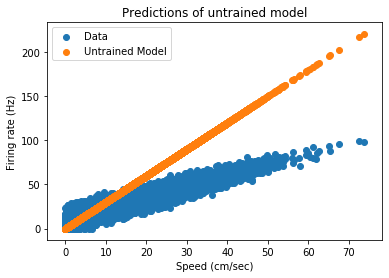

In [40]:
plt.scatter(speed,rate,label="Data")
plt.scatter(speed,yhat,label="Untrained Model")
plt.title("Predictions of untrained model")
plt.xlabel("Speed (cm/sec)")
plt.ylabel("Firing rate (Hz)")
plt.legend()
plt.show()

In [41]:
untrained_yhat=yhat

Untrained models are rarely very good.

## Measuring model performance

To be able to train any model, you need a measure of how bad it is doing it is doing. This is usually refer to as a `cost function`.

For linear regression model, the mean squared error (MSE) is often used. 


$MSE = \frac{1}{m} \sum_{i = 1}^{m}(\hat{y}^{i} - y^{i})^2$, where

* $m$ is the number of data points
* $y$ is the measured dependent variable (firing rate of the neuron) 
* $\hat{y}$ is the prediction of the model


### Exercise: Try to calculate the mean squared error (MES) for our untrained model

In [42]:
np.mean((yhat - rate)**2)

460.65552594092713

The task of training loop (machine learning) in this exercise is to modify the model parameters to reduce the MSE to the smallest value possible.

## Training procedure using gradient descent

We want to tweak the parameters with the goal of reducing the MSE. 

One way to do this is to use an optimization algorithm called **gradient descent**. 

Gradient descent is capable of finding optimal solutions to many type of problems/functions.


<div>
<img src="../images/gradient_descent.png" width="1000"/>
</div>


With gradient descent, we calculate what is the slope with the current parameters, then we change the parameters so that we move down the slope. 

The amount by which we move down the slope can be controlled by a model hyperparameter called `learning rate`.

The model hyperparameters are not optimized from the data. They control how the model learns. 

We can have a look at the cost function as a function of different values of theta.

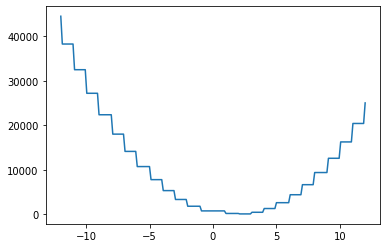

In [43]:
res = np.empty(200)
param_values = np.linspace(-12,12,200)
for i,t in enumerate(param_values):
    theta[1]=t # change the second parameter of the model
    res[i] = np.mean((rate-X@theta)**2)
plt.plot(param_values,res)
plt.show()

### Partial derivative of the cost function

To be able to adjust the parameters in the right direction, we need to know the slope for a specific value of $\theta$.

This is called the partial derivative for our parameters.

For the case of the MSE, the formula for the partial derivative is:

$\nabla_{\theta}MSE(\theta) = \frac{2}{m} X^{T}(X\theta - y)$

In [44]:
theta = np.array([1,-2.25])
m=rate.shape[0]
gradients = 2/m*(X.T @ (X@theta - rate))
print(gradients)

[  -95.63031608 -1850.94629566]


In the training loop, negative gradients mean that you increase the values of the coefficients to reduce the MSE.

Because we use all observations to calculate the gradients, this is called **batch gradient descent**.

For more complex models, you can use [pytorch](https://pytorch.org/) to calculate the derivative for you automatically.

### Our first training loop

This is a simple training loop. We loop several times and make small adjustments to the coefficients on each iteration.

In [45]:
eta = 0.002 # learning rate
n_iterations = 6000 
m = rate.shape[0] # number of data points

theta = np.random.rand(2) # set random parameters as a starting point

# learning loop
for iteration in range(n_iterations):

    # calculate the gradients with the current parameters
    gradients = 2/m*(X.T @ (X@theta - rate))
    
    # adjust the parameter so that we reduce the MSE
    theta = theta - eta * gradients
print("optimized theta:",theta)

optimized theta: [9.98704791 1.24864887]


If your training loop is not working as expected, plot the paramters and loss during learning.

One common problem is using a value for `eta` that is too large or too small.

optimized theta: [9.98704426 1.24864904]


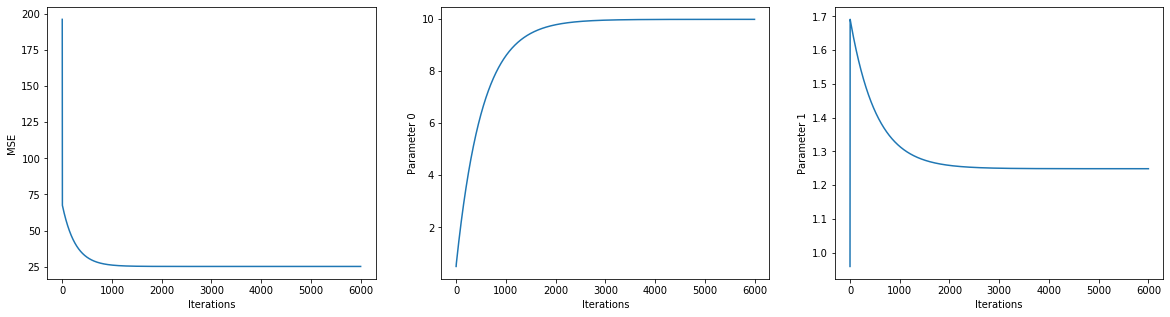

In [46]:
eta = 0.002
n_iterations = 6000
m = rate.shape[0]
theta = np.random.rand(2)

# arrays to store the results at each iteration
mse = np.empty(n_iterations)
tLearning = np.empty((n_iterations,2))


for iteration in range(n_iterations):
    gradients = 2/m*(X.T @ (X@theta - rate))
    
    # save results for the figure
    mse[iteration] = np.mean((rate-X@theta)**2)
    tLearning[iteration,:] = theta
    
    # change the parameters
    theta = theta - eta * gradients

print("optimized theta:",theta)

fig, ax = plt.subplots(1,3,figsize=(20,5))
ax[0].plot(mse)
ax[0].set_ylabel("MSE")
ax[0].set_xlabel("Iterations")

ax[1].plot(tLearning[:,0])
ax[1].set_ylabel("Parameter 0")
ax[1].set_xlabel("Iterations")

ax[2].plot(tLearning[:,1])
ax[2].set_ylabel("Parameter 1")
ax[2].set_xlabel("Iterations")

plt.show()

## Exercise: 

* Use our optimized model to make rate predictions 
* Plot the predicted and observed firing rates as a function of running speed. 

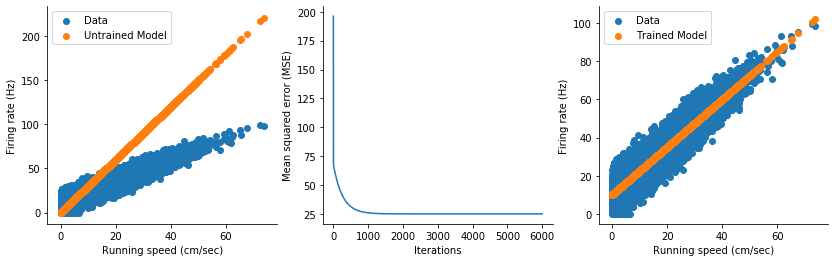

## Alternative ways to find the best parameters

### The closed-form 

For linear regressions, there is a formula that can give you the right parameters without the need of a training loop. 

$\hat{\theta} = (X^{T}X)^{-1} X^{T} y$

In [24]:
best_parameters = np.linalg.inv(X.T@X) @ X.T @ rate
print(best_parameters)

[9.98714383 1.24864435]


For many models, you will not have a closed-form solution. A training loop is used instead.

### sklearn.linear_model.LinearRegression

Scikit-Learn had built in classes to train linear and non-linear regression models. 

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [25]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,rate)
lin_reg.intercept_,lin_reg.coef_

(9.987143825778046, array([0.        , 1.24864435]))

### scipy.optimize.minimize()

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

This is a function that can be used to minimize several types of functions. It is not limited to linear regressions

scipy.optimize.minimize() takes several arguments:

* fun: an objective function that will be minimized
* x0: a vector with the model parameters
* args: additional parameters that are passed to the objective function




In [26]:
from scipy.optimize import minimize

# optimize() will try to minimize the value returned by objective_function()
# in our example, we can return the mean squared error of our model
def objective_function(x0,X,rate): 
    delta=x0
    yhat = X@delta
    mse = np.mean((rate-yhat)**2)
    return mse

x0 = np.array([15, 1]) # parameters to optimize
results = minimize(objective_function,x0,args=(X,rate))
print(results)

      fun: 25.22702100159137
 hess_inv: array([[ 1.04571001, -0.04917184],
       [-0.04917184,  0.00443069]])
      jac: array([-4.76837158e-07,  4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 4
     njev: 8
   status: 0
  success: True
        x: array([9.98714358, 1.24864436])


We get the same results.

Note that we did not have to calculate the partial derivative directly.

### pytorch

pytorch is a platform use principally to train deep neural network. 

pytorch can calculate the derivative for you. The computations can be sent to the GPU if needed (not implemented here)


In [27]:
import torch

# linear model making prediction
def model(X,delta):
    return X@delta
# loss function returning MSE
def loss_fn(y,yhat):
    squared_diff = (y-yhat)**2
    return squared_diff.mean()

# model parameters stored as a pytorch tensor, this makes the calculation of the gradients possible
delta = torch.tensor([5.0,2.0],requires_grad =True)

# we transform our data from numpy array to pytorch tensors, no need for gradients
XTensor = torch.tensor(X,dtype=torch.float32)
rateTensor= torch.tensor(rate,dtype=torch.float32)

# let's run the model once and calculating the loss
yhat = model(XTensor,delta)
loss = loss_fn(yhat,rateTensor)
loss.backward()

print("gradients: ",delta.grad)

# we need to zero the gradients otherwise they accumulate
delta.grad.zero_()


ModuleNotFoundError: No module named 'torch'

In [174]:
## training loop that will modify our parameters to minimize the loss function (MSE)
def training_loop(n_epochs, learning_rate, delta, XTensor,rateTensor):
    for epoch in range (n_epochs):

        if delta.grad is not None:
            delta.grad.zero_() 
        
        yhat = model(XTensor,delta)
        loss = loss_fn(yhat,rateTensor)
        loss.backward()
        
        with torch.no_grad():
            delta -= learning_rate * delta.grad
        
        if epoch % 1000 ==0:
            print("Epoch: {}, Loss: {}".format(epoch,loss))
    return delta

In [175]:
opt_delta = training_loop(n_epochs = 10000,
                          learning_rate = 0.001,
                          delta = torch.tensor([5.0,2.0],requires_grad =True),
                          XTensor = XTensor,
                          rateTensor=rateTensor)
print(opt_delta)

Epoch: 0, Loss: 99.78073120117188
Epoch: 1000, Loss: 26.786876678466797
Epoch: 2000, Loss: 25.284757614135742
Epoch: 3000, Loss: 25.062149047851562
Epoch: 4000, Loss: 25.029165267944336
Epoch: 5000, Loss: 25.024276733398438
Epoch: 6000, Loss: 25.0235538482666
Epoch: 7000, Loss: 25.02344512939453
Epoch: 8000, Loss: 25.02342987060547
Epoch: 9000, Loss: 25.023427963256836
tensor([9.9640, 1.2500], requires_grad=True)


Once again we found our initial parameters.

This type of output is very similar to what you see when you train DeepLabCut (more on this next week).

## Summary

* We implemented a linear regression model in python.
* We defined a cost function (MSE) to measure how good/bad the model predictions are.
* We calculated the partial derivative of the MSE for a set of coefficients.
* We wrote a training loop to adjust the coefficients iteratively in order to minimize MSE
* We covered 3 possible ways in which you can train models (klearn.linear_model, scipy.optimize.minimize and pytorch)


## Exercise

You now have the skills required to train models characterizing the firing rate of neurons. 

We will work with a neuron that changes its firing rate according to the direction of movement (-pi to pi) of the animal.

The simulated data is in `../data/hd_cell.npy`. The first column is the heading and the second the firing rate.

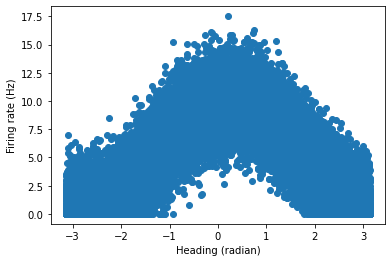

In [3]:
import numpy as np
import matplotlib.pyplot as plt


fn="../data/hd_cell.npy"
hd_cell = np.load(fn)

heading = hd_cell[:,0]
rate = hd_cell[:,1]

plt.scatter(hd_cell[:,0],hd_cell[:,1])
plt.ylabel("Firing rate (Hz)")
plt.xlabel("Heading (radian)")
plt.show()

The formula you can use to model this neuron is

$\hat{y} = w_{0} * (cos(x - w_{1})+1)/2$, where

* $\hat{y}$ is the prediction of the model
* $w$ is a vector with 2 parameters that we need to estimate
* $w_0$ is the gain
* $w_1$ is the preferred heading of the neuron
* $x$ is the animal heading

We would like to know the gain and preferred direction of this neuron. 

For training, you can use MSE as a loss function.

In [7]:
import torch

# model making prediction
def model(X,delta):
    """
    X: head direction of the neuron as a 1D array (tensor)
    delta: 2 parameters, as a 1D array (tensor)
    """
    return delta[0] * (torch.cos(X-delta[1])+1)/2


# loss function returning MSE
def loss_fn(y,yhat):
    """
    Loss function, mean squared error
    
    y: observed values
    yhat: model predictions
    """
    squared_diff = (y-yhat)**2
    return squared_diff.mean()

# model parameters stored as a pytorch tensor, this makes the calculation of the gradients possible
delta = torch.tensor([5.0,2.0],requires_grad =True)
print("Initial delta:",delta)
# we transform our data from numpy array to pytorch tensors, no need for gradients

# xTensor is the heading, as a torch tensor
XTensor = torch.tensor(heading,dtype=torch.float32)
# rateTensor is the rate, as a torch tensor
rateTensor= torch.tensor(rate,dtype=torch.float32)


# let's run the model once and calculating the loss
yhat = model(XTensor,delta)
loss = loss_fn(yhat,rateTensor)
loss.backward()

print("gradients: ",delta.grad)

# we need to zero the gradients otherwise they accumulate
delta.grad.zero_()


Initial delta: tensor([5., 2.], requires_grad=True)
gradients:  tensor([-0.9342, 11.3924])


tensor([0., 0.])

In [8]:
## training loop that will modify our parameters to minimize the loss function (MSE)
def training_loop(n_epochs, learning_rate, delta, XTensor,rateTensor):
    for epoch in range (n_epochs):

        if delta.grad is not None:
            delta.grad.zero_() 
        
        yhat = model(XTensor,delta)
        loss = loss_fn(yhat,rateTensor)
        loss.backward()
        
        with torch.no_grad():
            delta -= learning_rate * delta.grad
        
        if epoch % 1000 ==0:
            print("Epoch: {}, Loss: {}".format(epoch,loss))
    return delta

In [9]:
opt_delta = training_loop(n_epochs = 10000,
                          learning_rate = 0.001,
                          delta = torch.tensor([5.0,2.0],requires_grad =True),
                          XTensor = XTensor,
                          rateTensor=rateTensor)
print(opt_delta)

Epoch: 0, Loss: 26.955976486206055
Epoch: 1000, Loss: 5.691333770751953
Epoch: 2000, Loss: 3.923570394515991
Epoch: 3000, Loss: 3.5273642539978027
Epoch: 4000, Loss: 3.4385528564453125
Epoch: 5000, Loss: 3.4186439514160156
Epoch: 6000, Loss: 3.4141814708709717
Epoch: 7000, Loss: 3.4131813049316406
Epoch: 8000, Loss: 3.412956714630127
Epoch: 9000, Loss: 3.4129068851470947
tensor([10.0271,  0.2485], requires_grad=True)
